In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

import esda
import libpysal as lps

import os
GEODATA_PATH = 'data/geodata/'
os.listdir(GEODATA_PATH)

['AdministrativeBoundariesBARMMBarangays20190206PSA2016',
 'InfraRoadsARMMOSM2019',
 'SchoolsARMMDEPED2017']

## Barangays GeoData

In [2]:
brgys_geodata = gpd.read_file(GEODATA_PATH+'AdministrativeBoundariesBARMMBarangays20190206PSA2016/AdministrativeBoundariesBARMMBarangays20190206PSA2016.shp')
brgys_geodata.head()

,Reg_Code,Reg_Name,Pro_Code,Pro_Name,Mun_Code,Mun_Name,Bgy_Code,Bgy_Name,geometry
0,PH150000000,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),PH157000000,TAWI-TAWI,PH157001000,PANGLIMA SUGALA (BALIMBING),PH157001001,Balimbing Proper,"MULTIPOLYGON (((162191.469 562138.624, 162202...."
1,PH150000000,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),PH157000000,TAWI-TAWI,PH157001000,PANGLIMA SUGALA (BALIMBING),PH157001002,Batu-batu (Pob.),"POLYGON ((154788.744 561141.297, 154788.577 56..."
2,PH150000000,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),PH157000000,TAWI-TAWI,PH157001000,PANGLIMA SUGALA (BALIMBING),PH157001003,Buan,"MULTIPOLYGON (((174430.408 571246.155, 174433...."
3,PH150000000,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),PH157000000,TAWI-TAWI,PH157001000,PANGLIMA SUGALA (BALIMBING),PH157001004,Dungon,"POLYGON ((182461.829 575050.555, 182461.151 57..."
4,PH150000000,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),PH157000000,TAWI-TAWI,PH157001000,PANGLIMA SUGALA (BALIMBING),PH157001005,Luuk Buntal,"MULTIPOLYGON (((165920.073 551841.163, 165917...."


In [3]:
brgys_geodata.isna().sum()

Reg_Code    0
Reg_Name    0
Pro_Code    0
Pro_Name    0
Mun_Code    0
Mun_Name    0
Bgy_Code    0
Bgy_Name    0
geometry    0
dtype: int64

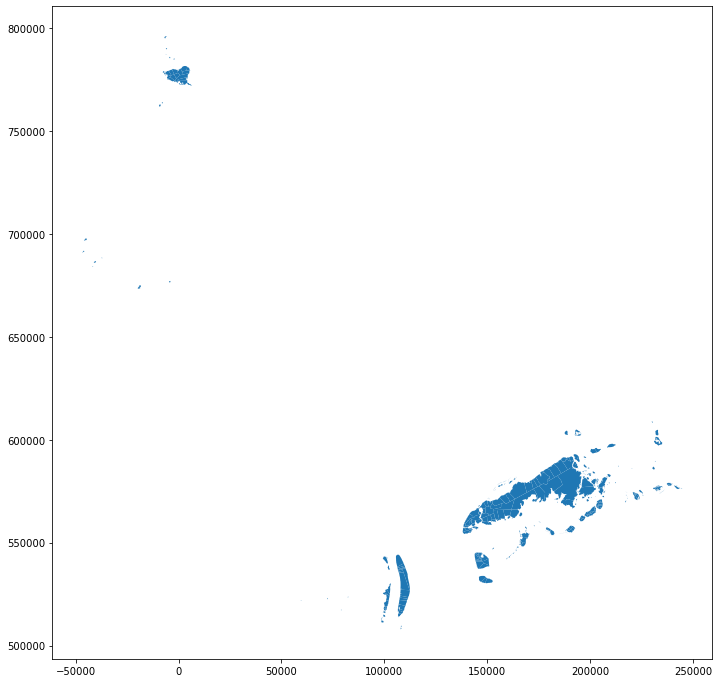

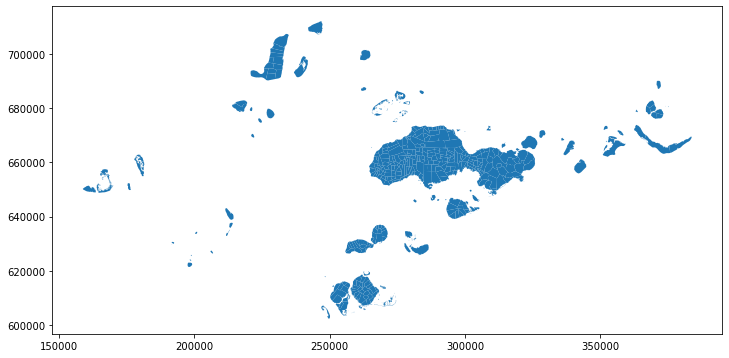

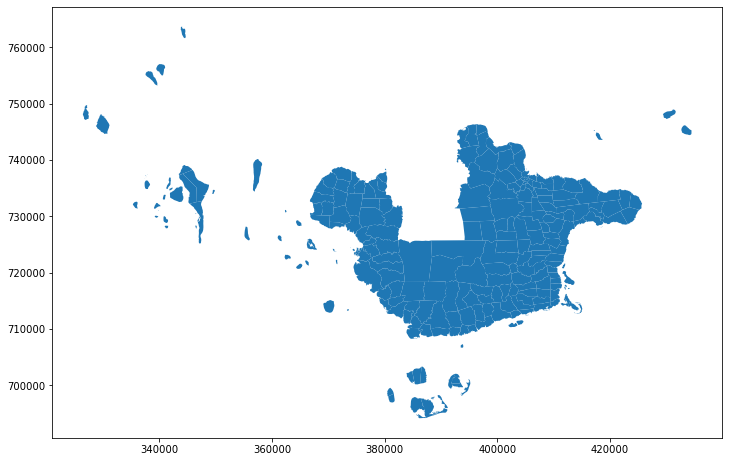

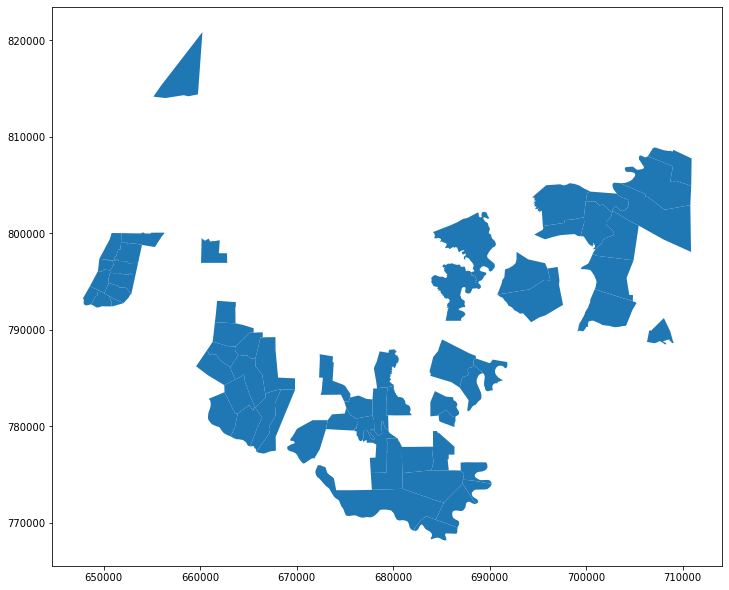

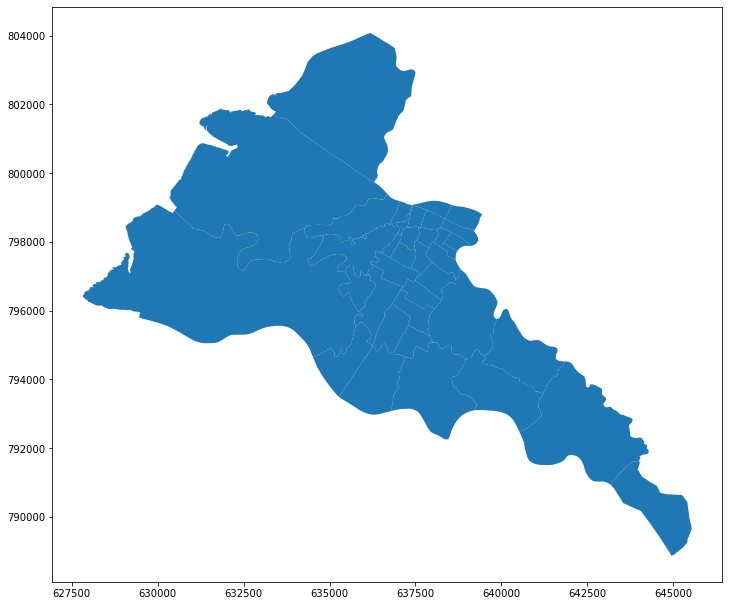

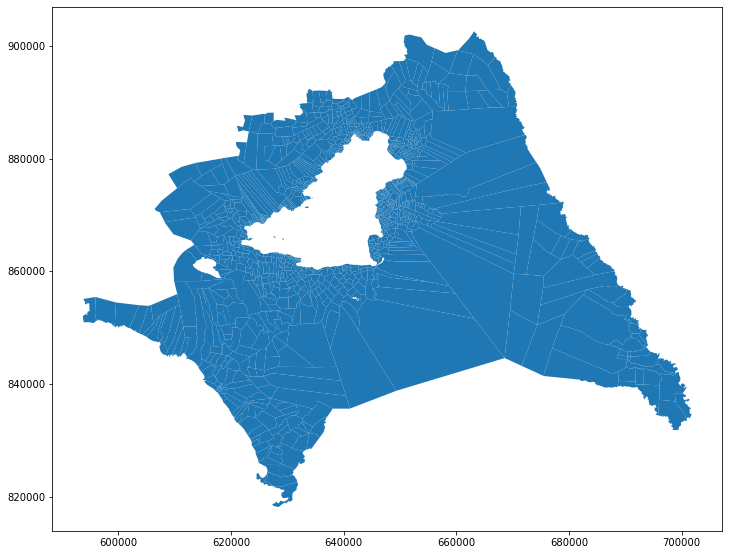

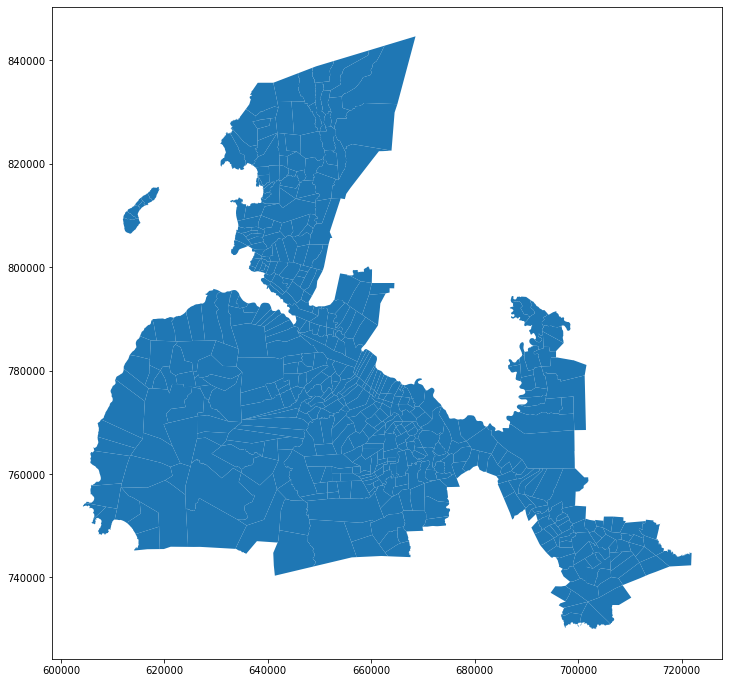

In [4]:
for province in brgys_geodata['Pro_Name'].unique():
    cond = brgys_geodata['Pro_Name']==province
    brgys_geodata[cond].plot(figsize=(12, 12))
    plt.show()

## Schools GeoData

In [5]:
schools_geodata = gpd.read_file(GEODATA_PATH+'SchoolsARMMDEPED2017/SchoolsARMMDEPED2017.shp')
schools_geodata.head()

,SCH_ID,SCH_NAME,SCH_CAT,SCH_TYPE,LAT,LONG,BARANGAY,MUNNAME,PROV,PSGC_MUNI,PSGC_BRGY,PSGC_PROV,geometry
0,133049,Abong-Abong ES,ES,Public,6.507703,121.910937,Abong-Abong,Maluso,BASILAN,PH150704000,PH150704001,PH150700000,POINT (121.91094 6.50770)
1,215015,Akbar ES,ES,Public,6.664125,122.195725,Upper Bato-Bato,Akbar,BASILAN,PH150708000,PH150708008,PH150700000,POINT (122.19572 6.66413)
2,133154,Amaloy ES,ES,Public,6.443614,122.126717,Amaloy,Ungkaya Pukan,BASILAN,PH150711000,PH150711001,PH150700000,POINT (122.12672 6.44361)
3,133023,Atong-Atong ES,ES,Public,6.660000,121.899633,Atong-Atong,Lantawan,BASILAN,PH150703000,PH150703001,PH150700000,POINT (121.89963 6.66000)
4,133081,Babag ES,ES,Public,6.342007,121.954045,Babag (Babuan Island),Tabuan-Lasa,BASILAN,PH150713000,PH150713001,PH150700000,POINT (121.95404 6.34201)


In [6]:
schools_geodata.describe()

,SCH_ID,LAT,LONG
count,2711.000000,2539.000000,2539.000000
mean,203773.028403,6.875545,123.004048
std,113530.265986,0.935225,1.741595
min,100804.000000,4.641594,118.311000
25%,133752.000000,6.052737,121.143735
50%,134504.000000,7.010479,124.149102
75%,217771.500000,7.780703,124.325308
max,800161.000000,8.092139,124.958000


In [7]:
schools_geodata.isna().sum()

SCH_ID         0
SCH_NAME       0
SCH_CAT        0
SCH_TYPE       0
LAT          172
LONG         172
BARANGAY       0
MUNNAME        0
PROV           0
PSGC_MUNI      0
PSGC_BRGY      0
PSGC_PROV      0
geometry       0
dtype: int64

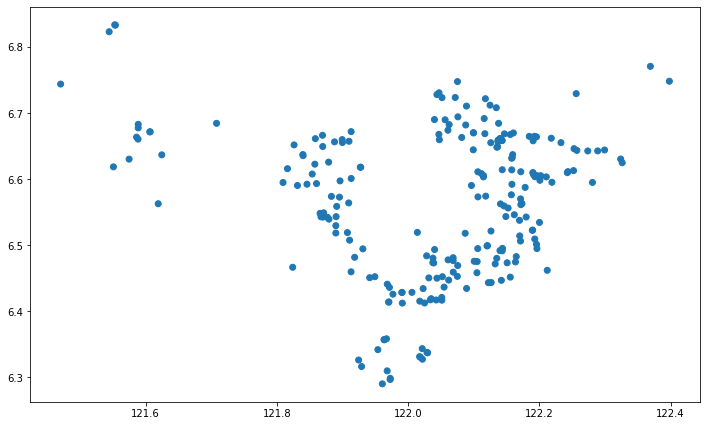

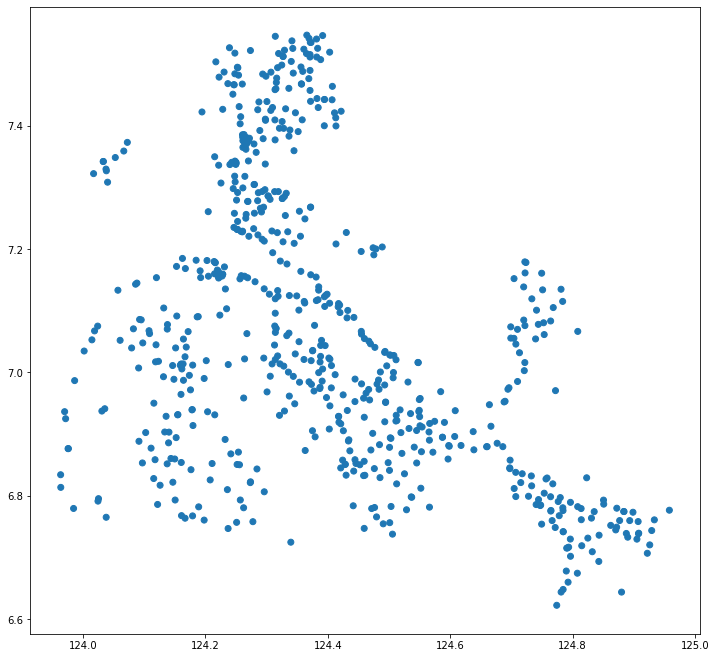

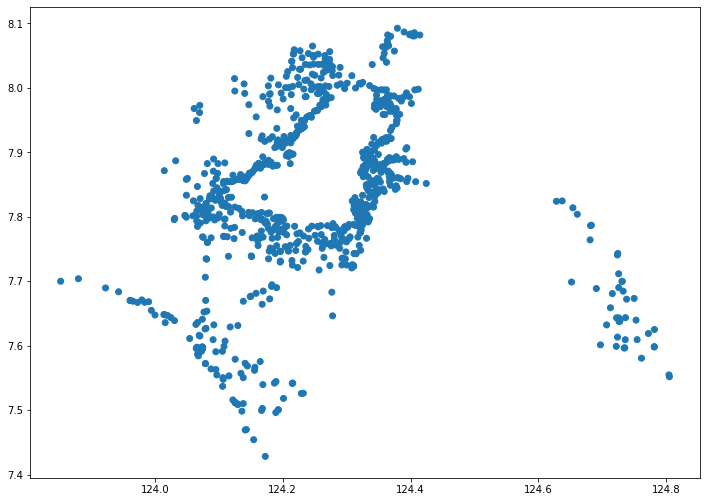

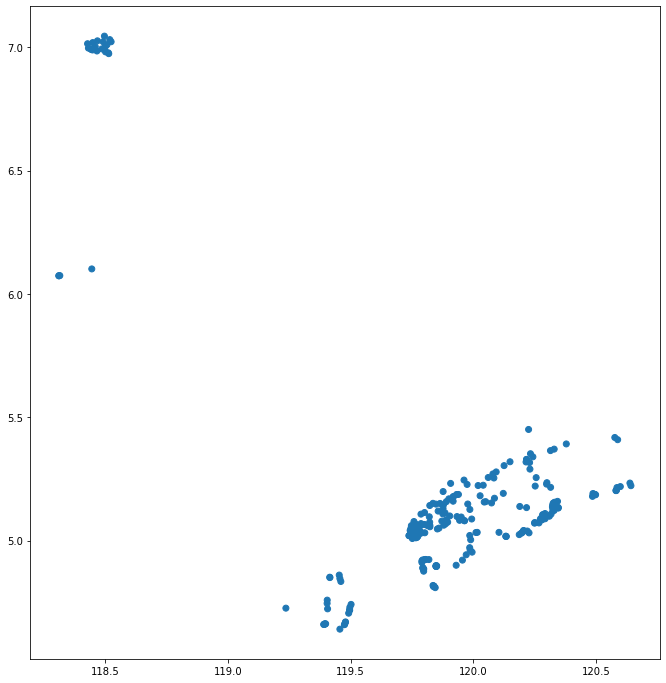

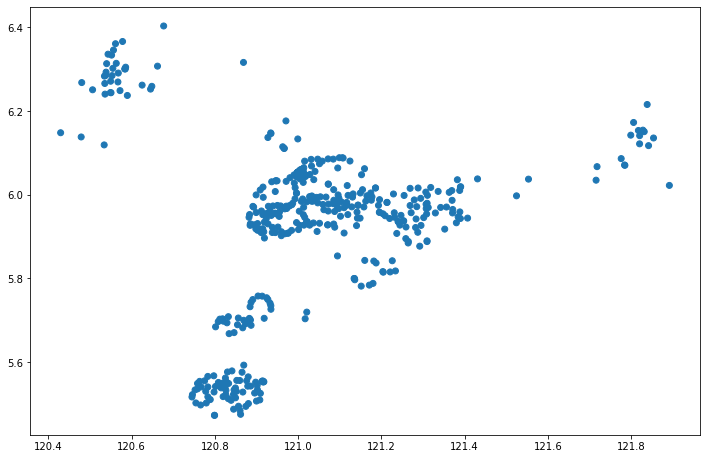

In [8]:
for province in schools_geodata['PROV'].unique():
    cond = schools_geodata['PROV']==province
    f, ax = plt.subplots(1, figsize=(12, 12))
    ax = schools_geodata[cond].dropna().plot(column="PROV", ax=ax)
    plt.show()

## Roads GeoData

In [9]:
roads_geodata = gpd.read_file(GEODATA_PATH+'InfraRoadsARMMOSM2019/InfraRoadsARMMOSM2019.shp')
roads_geodata.head()

,osm_id,code,fclass,name,ref,oneway,maxspeed,layer,bridge,tunnel,geometry
0,210935215,5113,primary,None,None,B,0,0,F,F,"LINESTRING (122.27089 6.64083, 122.27119 6.640..."
1,210935219,5113,primary,None,None,B,0,0,F,F,"LINESTRING (122.11945 6.50060, 122.11907 6.501..."
2,210935220,5142,track,None,None,B,0,0,F,F,"LINESTRING (122.14195 6.63450, 122.14231 6.634..."
3,210935221,5142,track,None,None,B,0,0,F,F,"LINESTRING (122.16074 6.63023, 122.16049 6.629..."
4,210935223,5142,track,None,None,B,0,0,F,F,"LINESTRING (122.22433 6.65494, 122.22405 6.655..."


In [10]:
roads_geodata.describe()

,code,maxspeed,layer
count,6573.000000,6573.000000,6573.000000
mean,5125.432375,0.896090,0.033622
std,11.113406,8.284191,0.180269
min,5112.000000,0.000000,0.000000
25%,5121.000000,0.000000,0.000000
50%,5122.000000,0.000000,0.000000
75%,5122.000000,0.000000,0.000000
max,5199.000000,100.000000,1.000000


In [11]:
roads_geodata.isna().sum()

osm_id         0
code           0
fclass         0
name        6191
ref         6390
oneway         0
maxspeed       0
layer          0
bridge         0
tunnel         0
geometry       0
dtype: int64

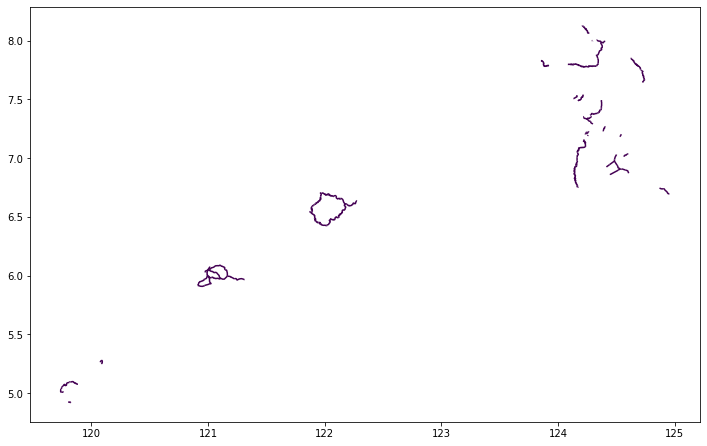

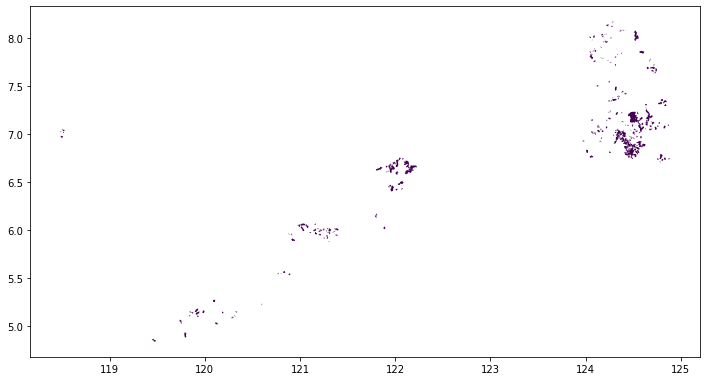

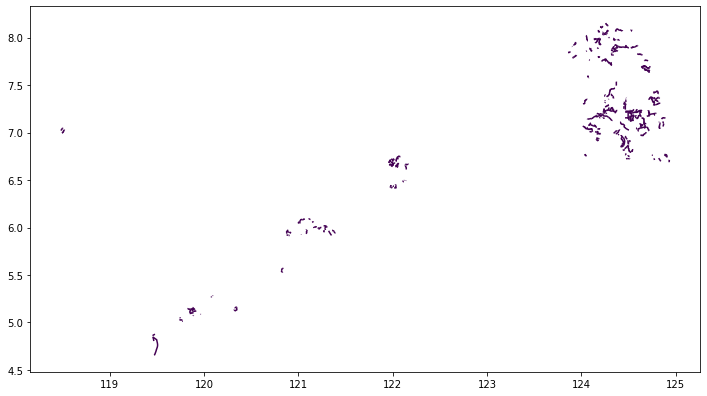

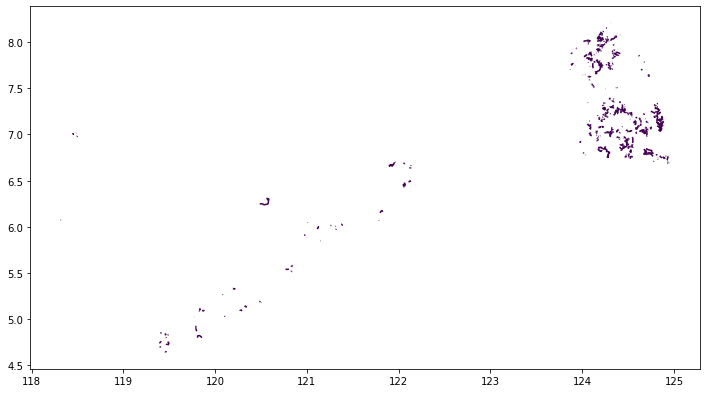

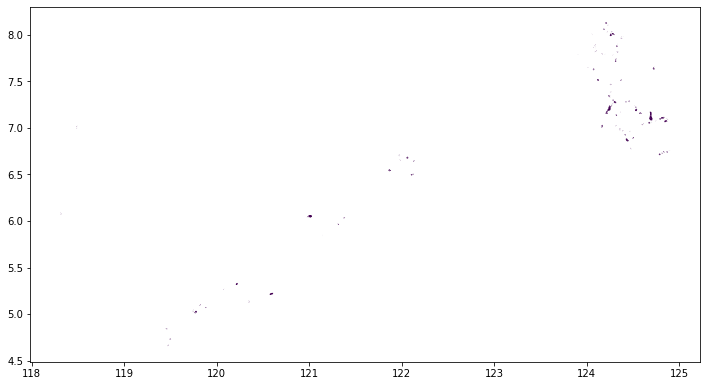

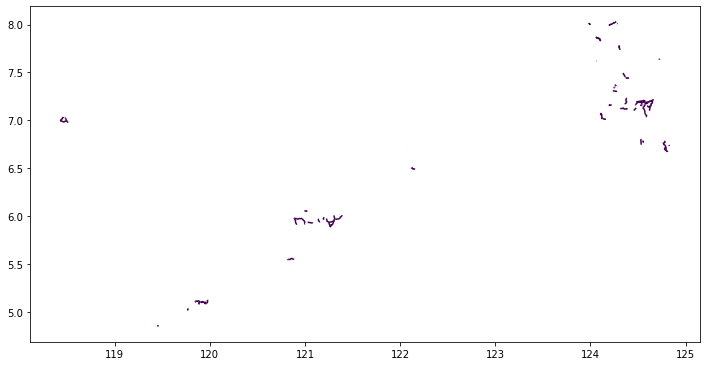

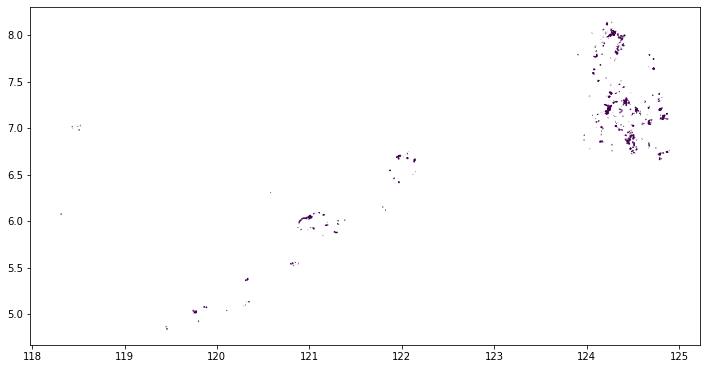

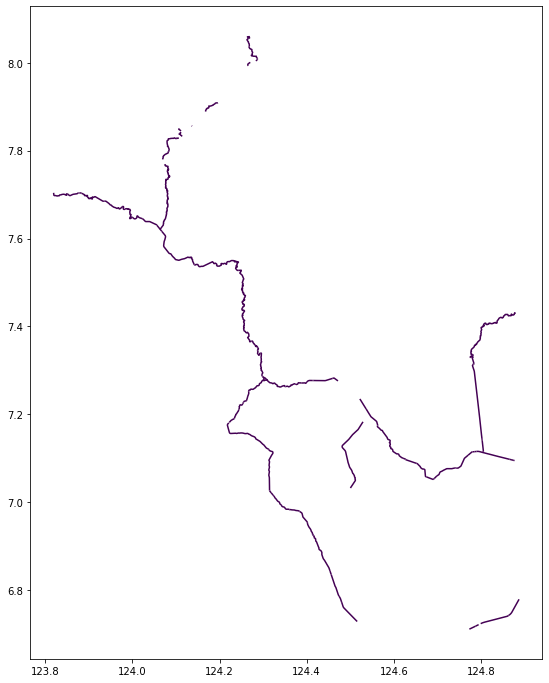

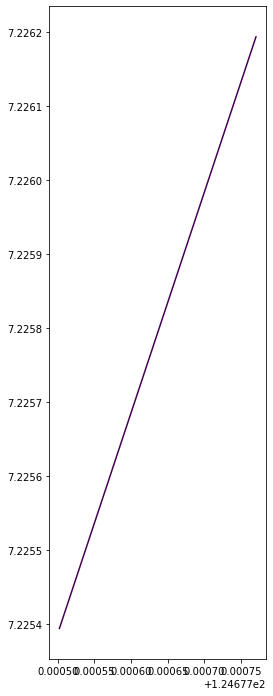

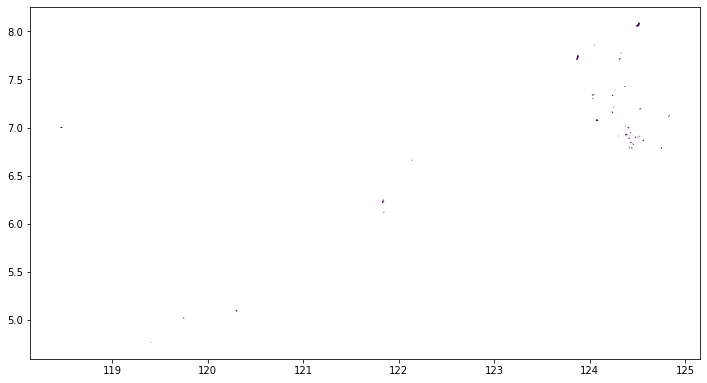

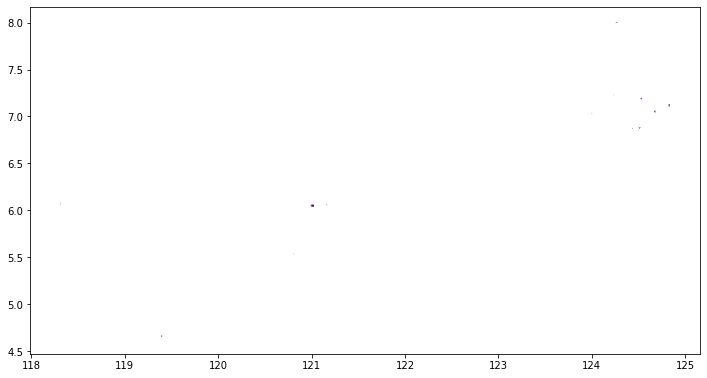

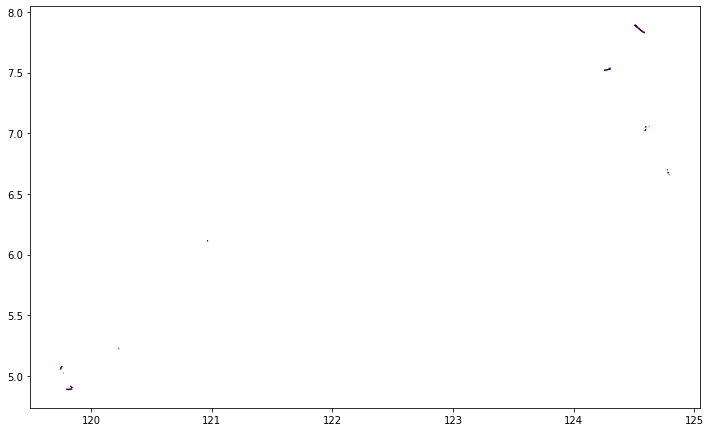

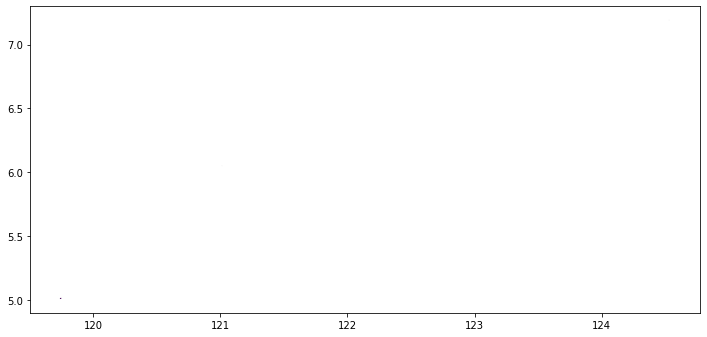

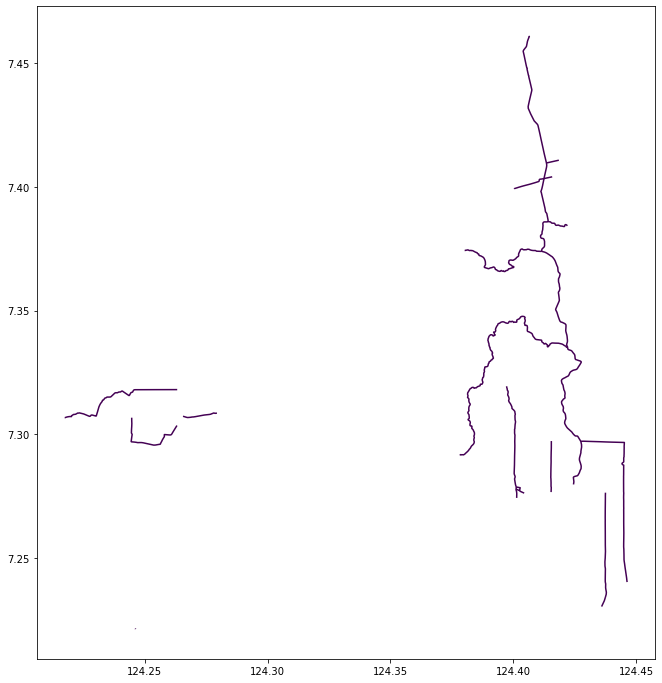

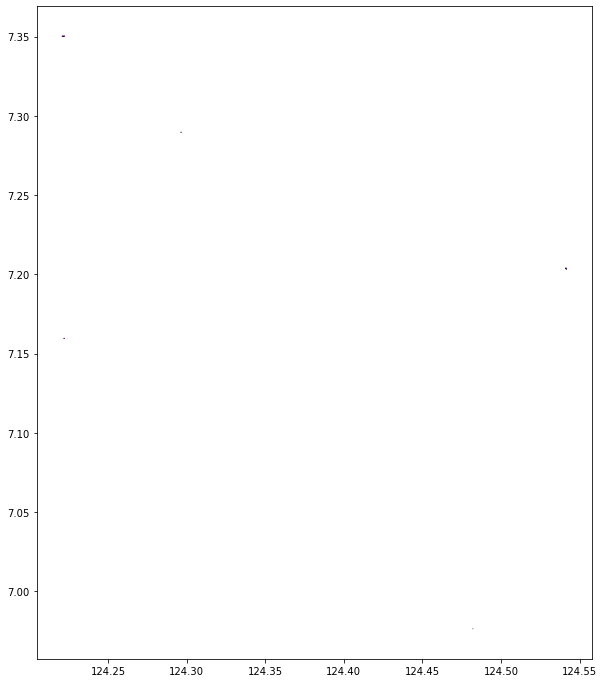

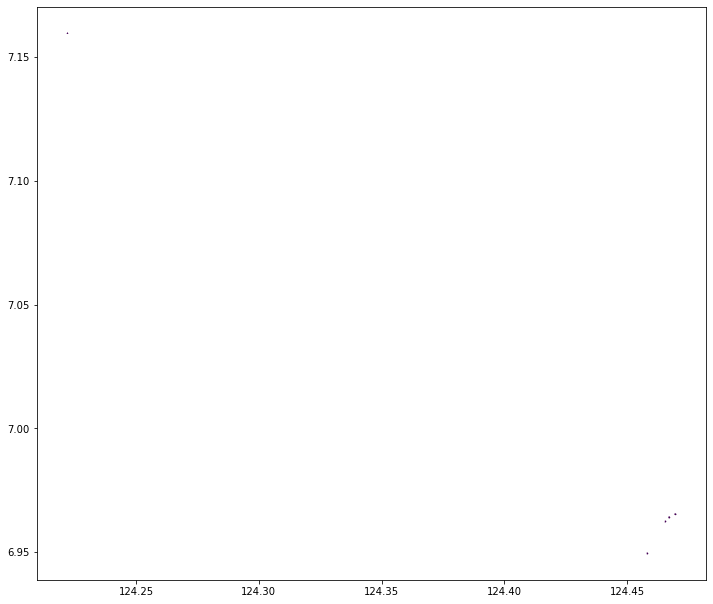

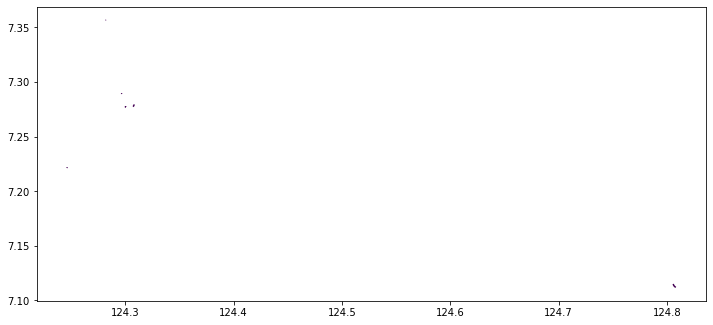

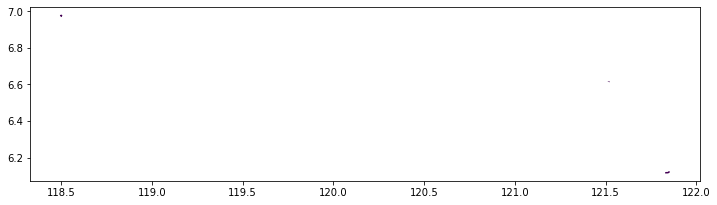

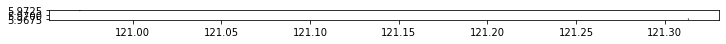

In [12]:
for province in roads_geodata['code'].unique():
    cond = roads_geodata['code']==province
    f, ax = plt.subplots(1, figsize=(12, 12))
    ax = roads_geodata[cond].plot(column="code", ax=ax)
    plt.show()